# Particle Swarm Optimization

In this report, we analyse the performance of the Particle Swarm Optimization (PSO) algorithm for optimizing the Sphere, Rastringin and Ackley functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pso import PSO
from functions import sphere, rastringin, ackley

## Swarm size

In this section, we analyse the impact of the swarm size for optimizing each function. The number of particles is set from 30 to 100, in steps of 10. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

### Sphere

In [2]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    pso = PSO(sphere, bounds, num_particles=n)
    results = []
    # executing the algorithm 30 times
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
        
    sphere_particle_number.append(n)
    sphere_results.append(results)

### Rastringin

In [3]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    pso = PSO(rastringin, bounds, num_particles=n)
    results = []
    # executing the algorithm 30 times
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
    
    rastringin_particle_number.append(n)
    rastringin_results.append(results)

### Ackley

In [4]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    pso = PSO(ackley, bounds, num_particles=n)
    results = []
    # executing the algorithm 30 times
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
    
    ackley_particle_number.append(n)
    ackley_results.append(results)

### Results

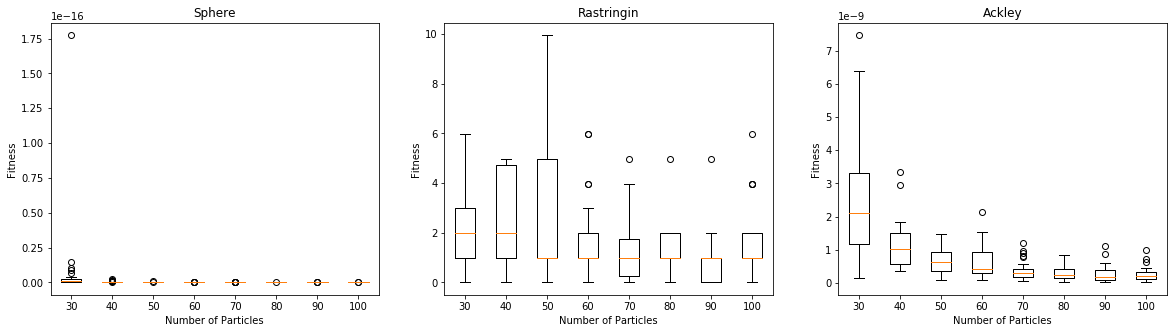

In [5]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), sphere_particle_number)
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), rastringin_particle_number)
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), ackley_particle_number)
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.show()

### Discussion

With the **sphere** function, we notice that the fitness is inversely proportional to the number of particles, as well as to the number of outliers. Moreover, all the results have a magnitude lesser than 1e-17. From 70 or 80 particles onward, the difference in the results is negligible. 

For the **rastringin** function, PSO hasn't attained results as good as with the sphere. From 50 particles onward, the results are roughly the same, as the averages are equivalent.

With **ackley**, the decreasing tendency is once again clear. Besides the average decrease, the variance between the experiments also is reduced, indicating better results overall.

The experiments suggest that a larger particle number can lead to better fitness values. A hypothesis is that with more particles, more of the objective function is covered, leading to a greater chance of finding a global optimum. However, as the **rastringin** results suggest, a function with numerous pronounced local optima can not be benefited from a bigger number of particles.

## Inertia value

In this section, we analyze the impact of the inertia value for optimizing each function. The inertia weight is set from 0.1 to 0.9, in steps of 10. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

### Sphere

In [6]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_inertia_value = []

# varying the inertia weight
for n in np.arange(0.1, 0.91, 0.1):
    pso = PSO(sphere, bounds, inertia=n)
    results = []
    # executing the algorithm 30 times
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
        
    sphere_inertia_value.append(n)
    sphere_results.append(results)

### Rastringin

In [7]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_inertia_value = []

# variando o número de partículas
for n in np.arange(0.1, 0.91, 0.1):
    pso = PSO(rastringin, bounds,inertia=n)
    results = []
    # executing the algorithm 30 times
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
    
    rastringin_inertia_value.append(n)
    rastringin_results.append(results)

### Ackley

In [8]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_inertia_value = []

# variando o número de partículas
for n in np.arange(0.1, 0.91, 0.1):
    pso = PSO(ackley, bounds,inertia=n)    
    results = []
    # executing the algorithm 30 times
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
    
    ackley_inertia_value.append(n)
    ackley_results.append(results)

### Results

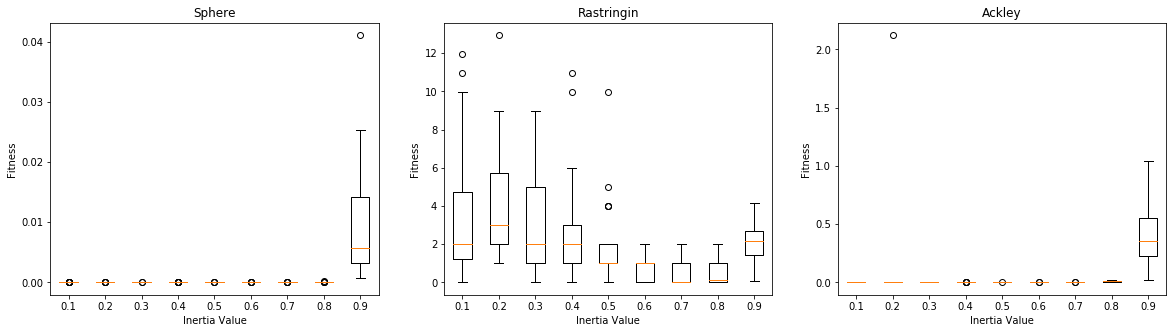

In [9]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), np.around(sphere_inertia_value,1))
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Inertia Value")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), np.around(rastringin_inertia_value,1))
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Inertia Value")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), np.around(ackley_inertia_value,1))
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Inertia Value")

plt.show()

### Discussion

For the **sphere** and **ackley** functions, the algorithm obtained its best results with inertia weights between 0.1 and 0.8. With 0.9, the fitness deteriorated. With **sphere** this transition is abrupt, as with **ackley** there is a slow development.

With **rastringin**, there is a decreasing tendency in fitness average as inertia varies from 0.1 to 0.8, but once again an inertia weight of 0.9 lead to worse results. 

The experiments show that some functions like **sphere** and **ackley** do not get any benefit from inertia values larger than 0.1, yet, show worse results for a value of 0.9. On the other hand, **rastringin** sees some benefits of increasing the inertia from 0.1 to 0.8, but once again is impaired by a value of 0.9. A hypothesis is that in functions with multiple pronounced local optima such as **rastringin**, inertia can help the particles not to get stuck on those optima, while in **ackley** (where the local optima are less pronounced) or **sphere** this does not help much. On the other hand, a high inertia weight can lead particles to "escape" the optimum, as they continue moving in a given direction.

## Global vs local topology

In this section, we analyze the impact of a global vs a local topology of 2 neighbors for each function. We compare the fitness progression through the algorithm iterations for each strategy. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

In [10]:
num_iter = 100
num_exec = 30
x = np.arange(1, num_iter + 1, 1) # iteration number array

# plot settings
ms = 5
lw = 2
capsize = 3
elw = 0.5

### Sphere

In [11]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_best_fitnesses_g = []
sphere_best_fitnesses_l = []
sphere_iter_results_g = [[] for i in range(num_iter)]
sphere_iter_results_l = [[] for i in range(num_iter)]
sphere_iter_mean_g = []
sphere_iter_mean_l = []
sphere_iter_std_g = []
sphere_iter_std_l = []

# executing global topology algorithm 30 times
pso_g = PSO(sphere, bounds, num_particles=50, maxiter=num_iter)

for i in range(num_exec):
    _, execution_best_fitnesses_g = pso_g.run()
    sphere_best_fitnesses_g.append(execution_best_fitnesses_g)
    
# executing local topology algorithm 30 times
pso_l = PSO(sphere, bounds, num_particles=50, maxiter=num_iter, num_neighbors=2)

for i in range(num_exec):
    _, execution_best_fitnesses_l = pso_l.run()
    sphere_best_fitnesses_l.append(execution_best_fitnesses_l)

# grouping results by iteration number
for i in range(len(sphere_best_fitnesses_g)):
    for j in range(len(sphere_best_fitnesses_g[i])):
        sphere_iter_results_g[j].append(sphere_best_fitnesses_g[i][j])
        sphere_iter_results_l[j].append(sphere_best_fitnesses_l[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(sphere_iter_results_g)):
    sphere_iter_mean_g.append(np.mean(sphere_iter_results_g[i]))
    sphere_iter_std_g.append(np.std(sphere_iter_results_g[i]))
    
    sphere_iter_mean_l.append(np.mean(sphere_iter_results_l[i]))
    sphere_iter_std_l.append(np.std(sphere_iter_results_l[i]))

### Results - Sphere

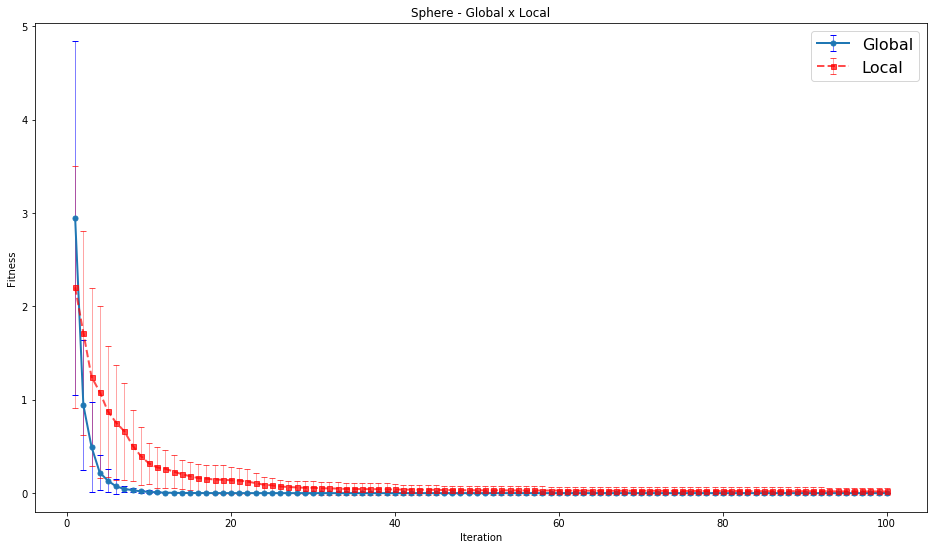

In [12]:
upper_limit = max(sphere_iter_mean_g) + sphere_iter_std_g[0] + 0.2

plt.figure(figsize=(16, 9))
plt.ylim(-0.2, upper_limit) 
plt.errorbar(x, np.array(sphere_iter_mean_g), np.array(sphere_iter_std_g), ms=ms, lw=lw, marker="o", \
             capsize=capsize, ecolor="blue", elinewidth=elw, label='Global')
plt.errorbar(x, np.array(sphere_iter_mean_l), np.array(sphere_iter_std_l), ms=ms, lw=lw, ls='--', \
             marker="s", capsize=capsize, color="r", ecolor="r", elinewidth=elw, label='Local', alpha=0.7)
plt.title('Sphere - Global x Local')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right', prop={'size': 16})

plt.show() 

### Rastringin

In [13]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_best_fitnesses_g = []
rastringin_best_fitnesses_l = []
rastringin_iter_results_g = [[] for i in range(num_iter)]
rastringin_iter_results_l = [[] for i in range(num_iter)]
rastringin_iter_mean_g = []
rastringin_iter_mean_l = []
rastringin_iter_std_g = []
rastringin_iter_std_l = []

# executing global topology algorithm 30 times
pso_g = PSO(rastringin, bounds, num_particles=50, maxiter=num_iter)

for i in range(num_exec):
    _, execution_best_fitnesses_g = pso_g.run()
    rastringin_best_fitnesses_g.append(execution_best_fitnesses_g)
    
# executing local topology algorithm 30 times
pso_l = PSO(rastringin, bounds, num_particles=50, maxiter=num_iter, num_neighbors=2)

for i in range(num_exec):
    _, execution_best_fitnesses_l = pso_l.run()
    rastringin_best_fitnesses_l.append(execution_best_fitnesses_l)

# grouping results by iteration number
for i in range(len(rastringin_best_fitnesses_g)):
    for j in range(len(rastringin_best_fitnesses_g[i])):
        rastringin_iter_results_g[j].append(rastringin_best_fitnesses_g[i][j])
        rastringin_iter_results_l[j].append(rastringin_best_fitnesses_l[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(rastringin_iter_results_g)):
    rastringin_iter_mean_g.append(np.mean(rastringin_iter_results_g[i]))
    rastringin_iter_std_g.append(np.std(rastringin_iter_results_g[i]))
    
    rastringin_iter_mean_l.append(np.mean(rastringin_iter_results_l[i]))
    rastringin_iter_std_l.append(np.std(rastringin_iter_results_l[i]))

### Results - Rastringin

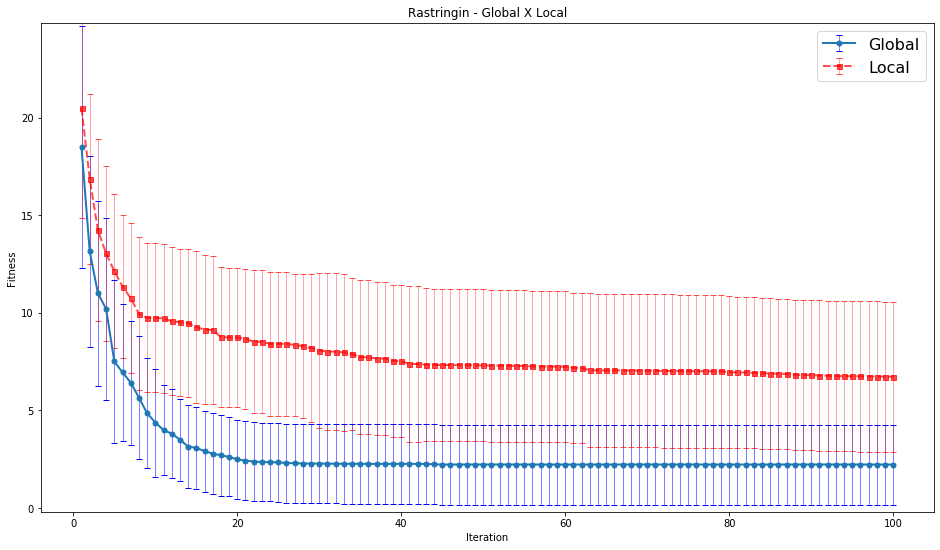

In [14]:
upper_limit = max(rastringin_iter_mean_g) + rastringin_iter_std_g[0] + 0.2


plt.figure(figsize=(16, 9))
plt.ylim(-0.2, upper_limit)  

plt.errorbar(x, np.array(rastringin_iter_mean_g), np.array(rastringin_iter_std_g), 
             ms=ms, lw=lw, marker="o", capsize=capsize, ecolor="blue", elinewidth=elw, label='Global')

plt.errorbar(x, np.array(rastringin_iter_mean_l), np.array(rastringin_iter_std_l),
             ms=ms, lw=lw, ls='--', marker="s", capsize=capsize, color="r", ecolor="r", elinewidth=elw, 
             label='Local', alpha=0.7)
plt.title('Rastringin - Global X Local')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right', prop={'size': 16})

plt.show()

### Ackley

In [15]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_best_fitnesses_g = []
ackley_best_fitnesses_l = []
ackley_iter_results_g = [[] for i in range(num_iter)]
ackley_iter_results_l = [[] for i in range(num_iter)]
ackley_iter_mean_g = []
ackley_iter_mean_l = []
ackley_iter_std_g = []
ackley_iter_std_l = []

# executing global topology algorithm 30 times
pso_g = PSO(ackley, bounds, num_particles=50, maxiter=num_iter)

for i in range(num_exec):
    _, execution_best_fitnesses_g = pso_g.run()
    ackley_best_fitnesses_g.append(execution_best_fitnesses_g)
    
# executing local topology algorithm 30 times
pso_l = PSO(ackley, bounds, num_particles=50, maxiter=num_iter, num_neighbors=2)

for i in range(num_exec):
    _, execution_best_fitnesses_l = pso_l.run()
    ackley_best_fitnesses_l.append(execution_best_fitnesses_l)

# grouping results by iteration number
for i in range(len(ackley_best_fitnesses_g)):
    for j in range(len(ackley_best_fitnesses_g[i])):
        ackley_iter_results_g[j].append(ackley_best_fitnesses_g[i][j])
        ackley_iter_results_l[j].append(ackley_best_fitnesses_l[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(ackley_iter_results_g)):
    ackley_iter_mean_g.append(np.mean(ackley_iter_results_g[i]))
    ackley_iter_std_g.append(np.std(ackley_iter_results_g[i]))
    
    ackley_iter_mean_l.append(np.mean(ackley_iter_results_l[i]))
    ackley_iter_std_l.append(np.std(ackley_iter_results_l[i]))

### Results - Ackley

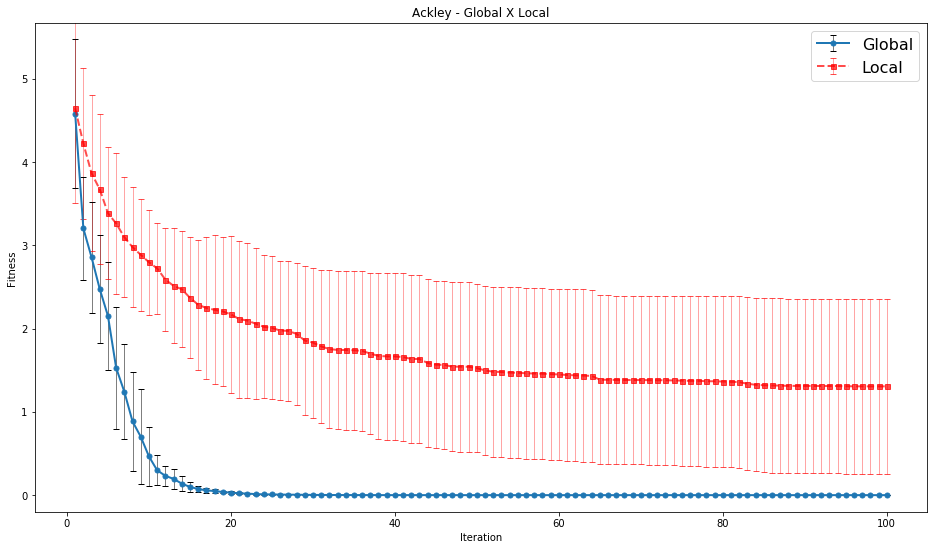

In [16]:
upper_limit = max(ackley_iter_mean_g) + ackley_iter_std_g[0] + 0.2

plt.figure(figsize=(16, 9))
plt.ylim(-0.2, upper_limit)  

plt.errorbar(x, np.array(ackley_iter_mean_g), np.array(ackley_iter_std_g),
             ms=ms, lw=lw, marker="o", capsize=capsize, ecolor="black", elinewidth=elw, label='Global')

plt.errorbar(x, np.array(ackley_iter_mean_l), np.array(ackley_iter_std_l),
             ms=ms, lw=lw, ls='--', marker="s", capsize=capsize, color="r", ecolor="r", elinewidth=elw, label='Local', alpha=0.7)

plt.title('Ackley - Global X Local')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right', prop={'size': 16})

plt.show()

### Discussion

The experiments show that, with **sphere**, convergence is several iterations slower with a *local* topology than with a *global* one. With **rastringin**, even though neither topology reached the global minimum, the *global* topology leads to better results with faster convergence. With **ackley** the difference is even more severe. The *global* version has a much steeper curve, quickly reaching the global minimum, while the *local* version has a slower behavior and can't reach the global minimum. In every case, the *global* topology is also more stable, as the error bars show.

This behavior is somehow expected. As the **sphere** function doesn't have any local optimum, each particle moves towards its best neighbour, reaching the optimum at a slower rate than with a *global* topology. The **rastringin** and **ackley** functions, on the other hand, have several local optima. With a small number of neighbors, particles tend to form "neighborhoods", that is, groups of particles that tend to explore a fraction of the space. This behavior can be useful in finding multiple optima. Increasing the number of neighbors can improve performance on global optimization.

## Velocity update with and without constriction factor

In this section, we analyze the impact of the usage of a constriction factor in the speed computing of a particle compared to the usage of an inertia weight. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

In [17]:
num_iter = 100
num_exec = 30
x = np.arange(1, num_iter+1, 1) # iteration number array

# plot settings
ms = 5
lw = 2
capsize = 3
elw = 0.5

### Sphere

In [18]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_best_fitnesses_k = []
sphere_best_fitnesses_w = []
sphere_iter_results_k = [[] for i in range(num_iter)]
sphere_iter_results_w = [[] for i in range(num_iter)]
sphere_iter_mean_k = []
sphere_iter_mean_w = []
sphere_iter_std_k = []
sphere_iter_std_w = []

# executing constricted velocity algorithm 30 times
pso_k = PSO(sphere, bounds, num_particles=50, maxiter=num_iter, constriction=True)

for i in range(num_exec):
    _, execution_best_fitnesses_k = pso_k.run()
    sphere_best_fitnesses_k.append(execution_best_fitnesses_k)
    
# executing inertia topology algorithm 30 times
pso_w = PSO(sphere, bounds, num_particles=50, maxiter=num_iter, constriction=False)

for i in range(num_exec):
    _, execution_best_fitnesses_w = pso_w.run()
    sphere_best_fitnesses_w.append(execution_best_fitnesses_w)

# grouping results by iteration number
for i in range(len(sphere_best_fitnesses_k)):
    for j in range(len(sphere_best_fitnesses_k[i])):
        sphere_iter_results_k[j].append(sphere_best_fitnesses_k[i][j])
        sphere_iter_results_w[j].append(sphere_best_fitnesses_w[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(sphere_iter_results_w)):
    sphere_iter_mean_k.append(np.mean(sphere_iter_results_k[i]))
    sphere_iter_std_k.append(np.std(sphere_iter_results_k[i]))
    
    sphere_iter_mean_w.append(np.mean(sphere_iter_results_w[i]))
    sphere_iter_std_w.append(np.std(sphere_iter_results_w[i]))

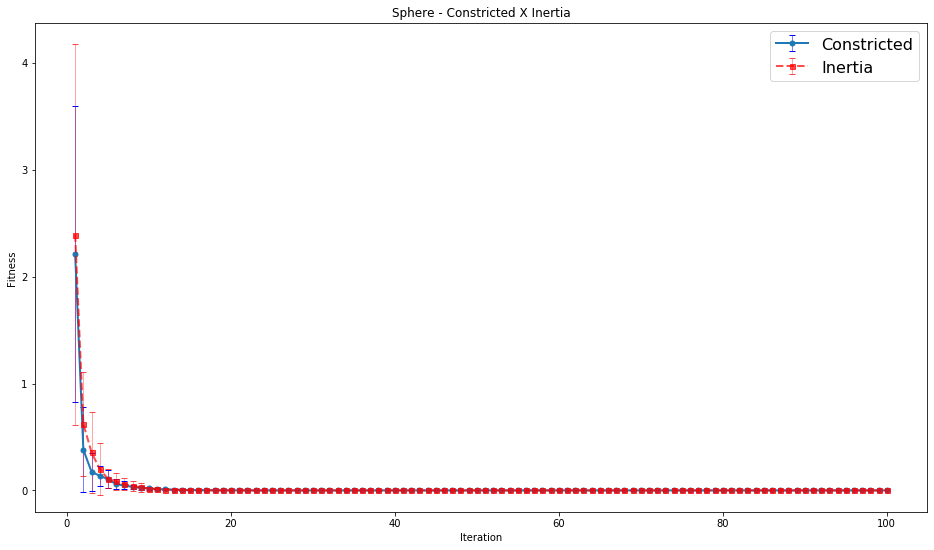

In [19]:
upper_limit = max(sphere_iter_mean_k + sphere_iter_mean_w) + max(sphere_iter_std_w + sphere_iter_std_k) + 0.2

plt.figure(figsize=(16, 9))
plt.ylim(-0.2, upper_limit)

plt.errorbar(x, np.array(sphere_iter_mean_k), np.array(sphere_iter_std_k), 
             ms=ms, lw=lw, marker="o", capsize=capsize, ecolor="blue", elinewidth=elw, label='Constricted')

plt.errorbar(x, np.array(sphere_iter_mean_w), np.array(sphere_iter_std_w),
             ms=ms, lw=lw, ls='--', marker="s", capsize=capsize, color="r", ecolor="r", elinewidth=elw, 
             label='Inertia', alpha=0.7)

plt.title('Sphere - Constricted X Inertia')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})

plt.show() 

### Rastringin

In [20]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_best_fitnesses_k = []
rastringin_best_fitnesses_w = []
rastringin_iter_results_k = [[] for i in range(num_iter)]
rastringin_iter_results_w = [[] for i in range(num_iter)]
rastringin_iter_mean_k = []
rastringin_iter_mean_w = []
rastringin_iter_std_k = []
rastringin_iter_std_w = []

# executing constricted velocity algorithm 30 times
pso_k = PSO(rastringin,bounds, num_particles=50, maxiter=num_iter,constriction=True)

for i in range(num_exec):
    _, execution_best_fitnesses_k = pso_k.run()
    rastringin_best_fitnesses_k.append(execution_best_fitnesses_k)
    
# executing inertia algorithm 30 times
pso_w = PSO(rastringin, bounds, num_particles=50, maxiter=num_iter, constriction=False)

for i in range(num_exec):
    _, execution_best_fitnesses_w = pso_w.run()
    rastringin_best_fitnesses_w.append(execution_best_fitnesses_w)

# grouping results by iteration number
for i in range(len(rastringin_best_fitnesses_k)):
    for j in range(len(rastringin_best_fitnesses_k[i])):
        rastringin_iter_results_k[j].append(rastringin_best_fitnesses_k[i][j])
        rastringin_iter_results_w[j].append(rastringin_best_fitnesses_w[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(rastringin_iter_results_w)):
    rastringin_iter_mean_k.append(np.mean(rastringin_iter_results_k[i]))
    rastringin_iter_std_k.append(np.std(rastringin_iter_results_k[i]))
    
    rastringin_iter_mean_w.append(np.mean(rastringin_iter_results_w[i]))
    rastringin_iter_std_w.append(np.std(rastringin_iter_results_w[i]))

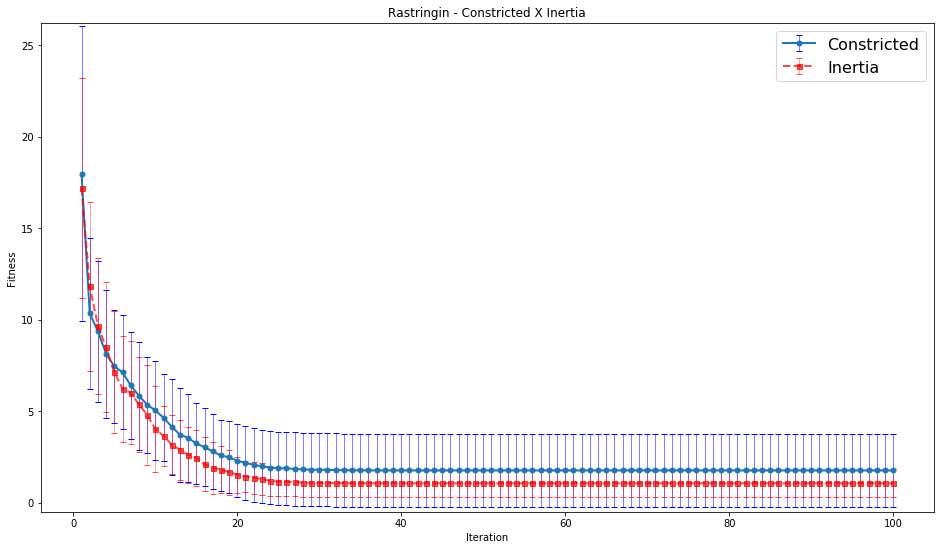

In [21]:
upper_limit = max(rastringin_iter_mean_k + rastringin_iter_mean_w) + max(rastringin_iter_std_k + rastringin_iter_std_w) + 0.2

plt.figure(figsize=(16, 9))
plt.ylim(-0.5, upper_limit)

plt.errorbar(x, np.array(rastringin_iter_mean_k), np.array(rastringin_iter_std_k), 
             ms=ms, lw=lw, marker="o", capsize=capsize, ecolor="blue", elinewidth=elw, label='Constricted')

plt.errorbar(x, np.array(rastringin_iter_mean_w), np.array(rastringin_iter_std_w), 
             ms=ms, lw=lw, ls='--', marker="s", capsize=capsize, color="r", ecolor="r", elinewidth=elw, label='Inertia', alpha=0.7)

plt.title('Rastringin - Constricted X Inertia')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})

plt.show() 

### Ackley

In [22]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_best_fitnesses_k = []
ackley_best_fitnesses_w = []
ackley_iter_results_k = [[] for i in range(num_iter)]
ackley_iter_results_w = [[] for i in range(num_iter)]
ackley_iter_mean_k = []
ackley_iter_mean_w = []
ackley_iter_std_k = []
ackley_iter_std_w = []

# executing constricted velocity algorithm 30 times
pso_k = PSO(ackley,bounds, num_particles=50, maxiter=num_iter,constriction=1)

for i in range(num_exec):
    _, execution_best_fitnesses_k = pso_k.run()
    ackley_best_fitnesses_k.append(execution_best_fitnesses_k)
    
# executing local topology algorithm 30 times
pso_w = PSO(ackley, bounds, num_particles=50, maxiter=num_iter, constriction=0)

for i in range(num_exec):
    _, execution_best_fitnesses_w = pso_w.run()
    ackley_best_fitnesses_w.append(execution_best_fitnesses_w)

# grouping results by iteration number
for i in range(len(ackley_best_fitnesses_k)):
    for j in range(len(ackley_best_fitnesses_k[i])):
        ackley_iter_results_k[j].append(ackley_best_fitnesses_k[i][j])
        ackley_iter_results_w[j].append(ackley_best_fitnesses_w[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(ackley_iter_results_w)):
    ackley_iter_mean_k.append(np.mean(ackley_iter_results_k[i]))
    ackley_iter_std_k.append(np.std(ackley_iter_results_k[i]))
    
    ackley_iter_mean_w.append(np.mean(ackley_iter_results_w[i]))
    ackley_iter_std_w.append(np.std(ackley_iter_results_w[i]))

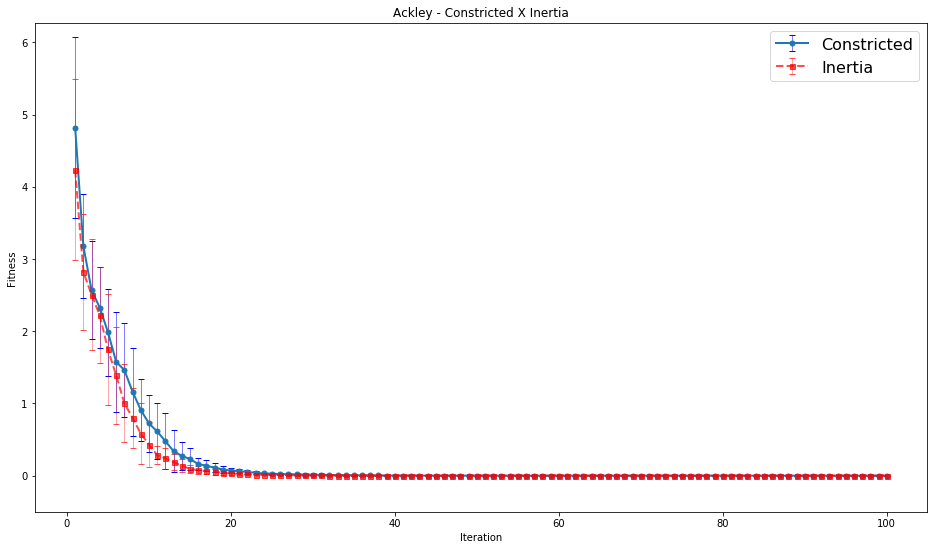

In [23]:
upper_limit = max(ackley_iter_mean_k + ackley_iter_mean_w) + max(ackley_iter_std_k + ackley_iter_std_w) + 0.2

plt.figure(figsize=(16, 9))

plt.ylim(-0.5, upper_limit)  

plt.errorbar(x, np.array(ackley_iter_mean_k), np.array(ackley_iter_std_k), 
             ms=ms, lw=lw, marker="o", capsize=capsize, ecolor="blue", elinewidth=elw, label='Constricted')

plt.errorbar(x, np.array(ackley_iter_mean_w), np.array(ackley_iter_std_w), 
             ms=ms, lw=lw, ls='--', marker="s", capsize=capsize, color="r", ecolor="r", elinewidth=elw, label='Inertia', alpha=0.7)

plt.title('Ackley - Constricted X Inertia')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})

plt.show() 

### Discussion

With **sphere** and **ackley**, both velocity update rules reached the minimum. In **sphere**, the constricted version has a slightly faster convergence, while the opposite happens with **ackley**. In **rastringin**, the inertia version presented the best results, reaching a better fitness value and also a minor variance.

Both *inertia* and *constriction* factor are approaches to balance the exploration-exploitation trade-off with PSO. In our experiments the results were very similar, the exception being **rastringin** function. In conclusion, for our set of functions and default settings, the inertia approach is preferable over a velocity update with a constriction factor.